## Импорт библиотек

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.image as mpimg

## Загрузка данных

In [6]:
df = pd.read_csv('titanic.csv')

## Первичный обзор данных (EDA)

In [28]:
#Посмотрим на первые 10 строк датафрейма
df.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


In [12]:
#Выведем общую информацию о каждом атрибуте
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [14]:
#Выведем статистические сводки для числовых столбцов
df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [20]:
#Оценим размер датафрейма
df.shape

(887, 8)

In [24]:
#Проверим на пропущенные значения каждый столбец
df.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [26]:
#Узнаем количество уникальных значений в каждом столбце
df.nunique()

Survived                     2
Pclass                       3
Name                       887
Sex                          2
Age                         89
Siblings/Spouses Aboard      7
Parents/Children Aboard      7
Fare                       248
dtype: int64

## Визуализация распределений (Matplotlib / Seaborn)

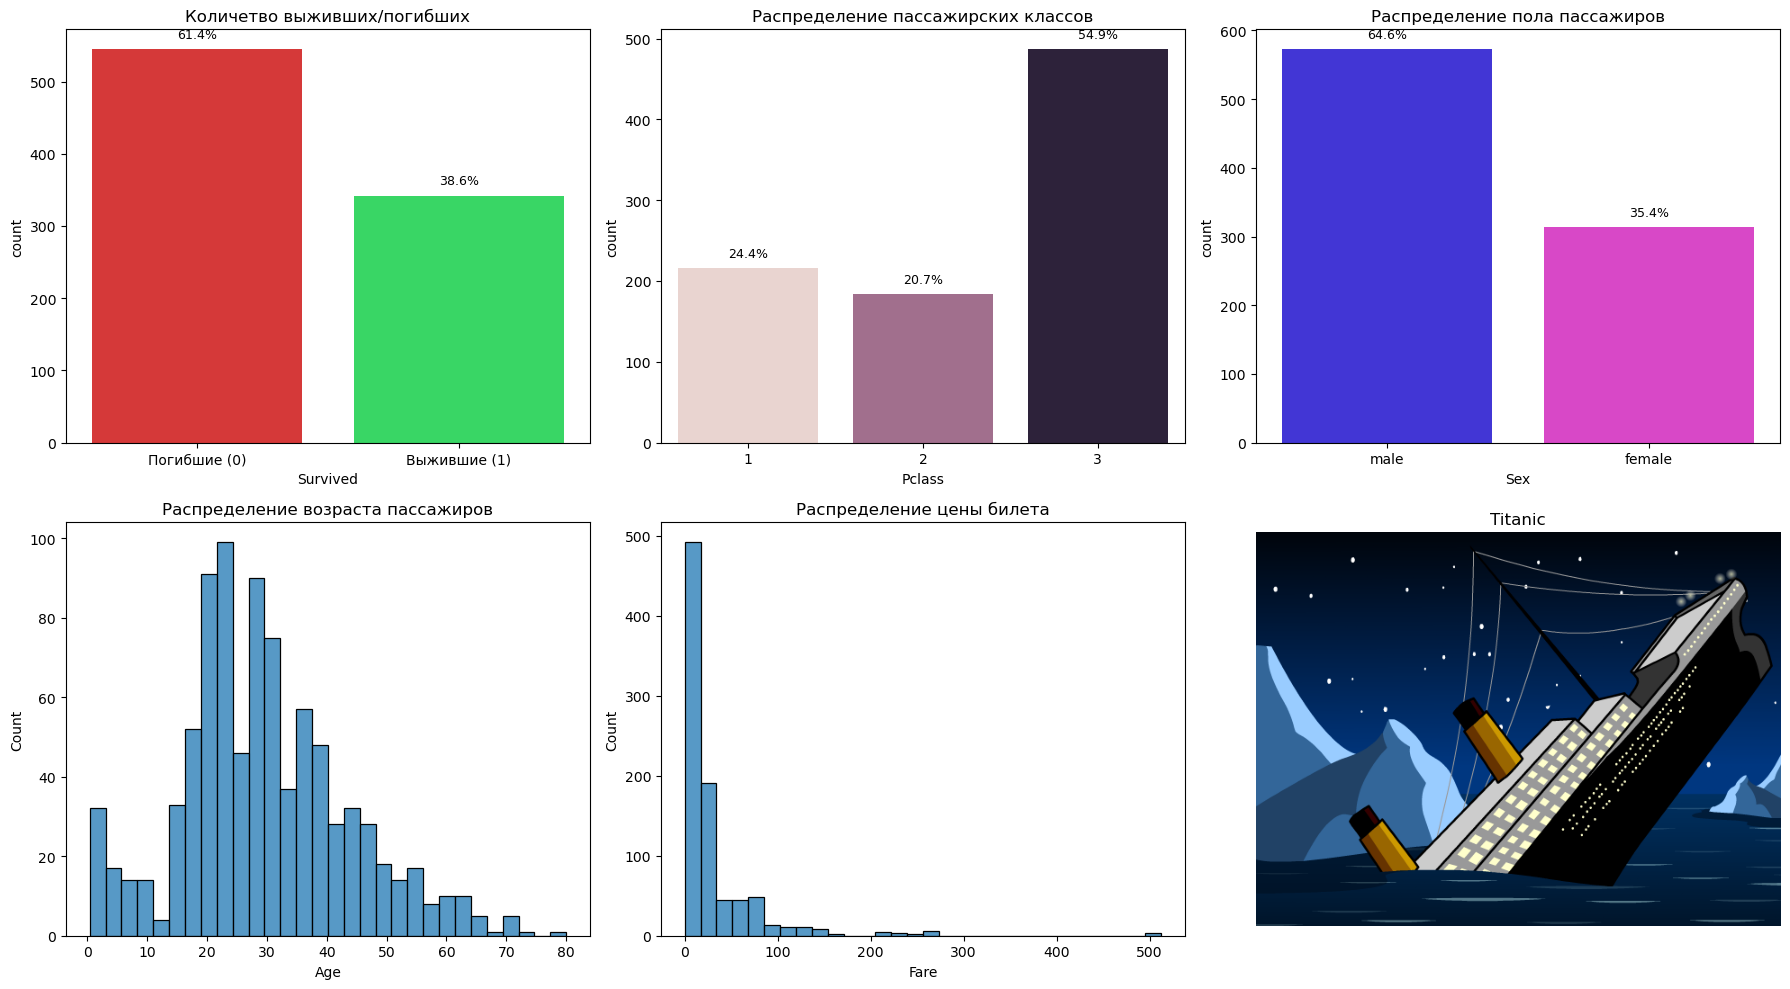

In [52]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Общее количество пассажиров для расчета процентов
total_passengers = len(df)

# Функция для добавления процентов на столбцы
def add_percentages_to_countplot(ax, total_count):
    for p in ax.patches:
        height = p.get_height()
        if height == 0: # Пропускаем пустые столбцы
            continue
        percentage = (height / total_count) * 100
        # Координаты для текста: x - центр столбца, y - немного выше столбца
        ax.text(p.get_x() + p.get_width() / 2.,
                height + (ax.get_ylim()[1] * 0.02), # Небольшой отступ сверху, адаптирующийся к масштабу
                f'{percentage:.1f}%', # Форматирование процента до одного знака после запятой
                ha='center', # Горизонтальное выравнивание по центру
                va='bottom', # Вертикальное выравнивание снизу (текст над столбцом)
                fontsize=9) # Размер шрифта

# 1. Оценим распределение атрибута "Survived"
ax_survived = axes[0, 0]
sns.countplot(x='Survived', data=df, hue='Survived', ax=ax_survived, palette={0: '#EF1F1F', 1: '#1FF05A'}, legend=False)
ax_survived.set_title('Количетво выживших/погибших')
ax_survived.set_xticks([0, 1])  
ax_survived.set_xticklabels(['Погибшие (0)', 'Выжившие (1)'])  
# Добавляем проценты
add_percentages_to_countplot(ax_survived, total_passengers)

# 2. Оценим распределение атрибута "Pclass"
ax_pclass = axes[0, 1]
sns.countplot(x='Pclass', data=df, hue='Pclass', ax=ax_pclass, legend=False)
ax_pclass.set_title('Распределение пассажирских классов')
# Добавляем проценты
add_percentages_to_countplot(ax_pclass, total_passengers)

# 3. Оценим распределение атрибута "Sex"
ax_sex = axes[0, 2]
sns.countplot(x='Sex', data=df, hue='Sex', ax=ax_sex, palette={'female': '#F030D9', 'male': '#2B1BF0'}, legend=False)
ax_sex.set_title('Распределение пола пассажиров')
# Добавляем проценты
add_percentages_to_countplot(ax_sex, total_passengers)

#Оценим распределение атрибута "Age"
sns.histplot(df['Age'].dropna(), bins=30, ax=axes[1, 0])
axes[1, 0].set_title('Распределение возраста пассажиров')

#Оценим распределение атрибута "Fare"
sns.histplot(df['Fare'].dropna(), bins=30, ax=axes[1, 1])
axes[1, 1].set_title('Распределение цены билета')

#Картинка в последней области
img = mpimg.imread(r'C:\Users\forki\PycharmProjects\titanic_project\img\titanic_image.png')  
axes[1, 2].imshow(img)
axes[1, 2].axis('off')  
axes[1, 2].set_title('Titanic') 

plt.tight_layout()

Выводы по предварительному анализу:
1. Общее представление о масштабе трагедии:

   При крушении судна выжило чуть больше трети от общего количества пассажиров. Погибло - 61,4%.
   
2. Общее представление о распределении по классам:

   Подавляющее большинство пассажиров составляли мужчины. Наиболее многочисленная возрастная группа среди пассажиров (и особенно среди мужчин) — это люди в возрасте от 20 до 35 лет.

   
3. Средняя соиомсть билета на Титаник составила 32.3£

## Очистка данных

In [132]:
#Т.к. пропущенные значения отсутствуют, работа над ними не требуется
df.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

## Feature Engineering

In [135]:
#Создадим признак "FamilySize": Количество членов семьи на борту

#Siblings/Spouses Aboard + Parents/Children Aboard + 1 (сам пассажир)
df['FamilySize'] = df['Siblings/Spouses Aboard'] + df['Parents/Children Aboard'] + 1 

In [139]:
#Создадим признак "IsAlone": Является ли пассажир одиночкой (если FamilySize == 1).
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

In [57]:
#Создаем признак 'IsChild': Является ли пассажир ребёнком (True = ребенок)
df['IsChild'] = df['Age'] < 18 

- Таким образом данные были немного улучшены для дальнейшего анализа

## Детальный анализ выживаемости (EDA 2.0)

### Влияние пола (Sex)

In [168]:
#Построим сводную таблицу Survived по Sex
pd.crosstab(df['Sex'], df['Survived'])

Survived,0,1
Sex,,
female,81,233
male,464,109


In [158]:
#Узнаем процент выживаемости для наглядности
cross_tab_norm = pd.crosstab(df['Sex'], df['Survived'], normalize='index') * 100
print(cross_tab_norm.round(1))

Survived     0     1
Sex                 
female    25.8  74.2
male      81.0  19.0


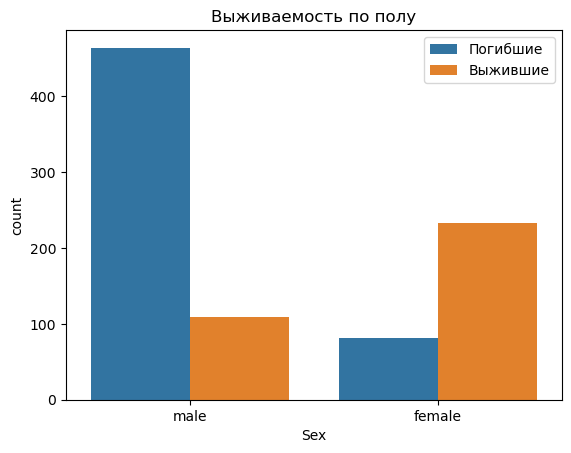

In [154]:
#Визуализируем эти данные через Seaborn
sns.countplot(x='Sex', data=df, hue='Survived')
plt.title('Выживаемость по полу')
plt.legend(['Погибшие', 'Выжившие'])

- Инсайт: Очевидное преобладание выживших женщин ("Женщины и дети в первую очередь")

### Влияние класса (Pclass)

In [170]:
#Построим сводную таблицу Survived по Pclass
pd.crosstab(df['Pclass'], df['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,368,119


In [175]:
#Узнаем процент выживаемости в зависимости от пассажирского класса
cross_tab_norm = pd.crosstab(df['Pclass'], df['Survived'], normalize='index') * 100
print(cross_tab_norm.round(1))

Survived     0     1
Pclass              
1         37.0  63.0
2         52.7  47.3
3         75.6  24.4


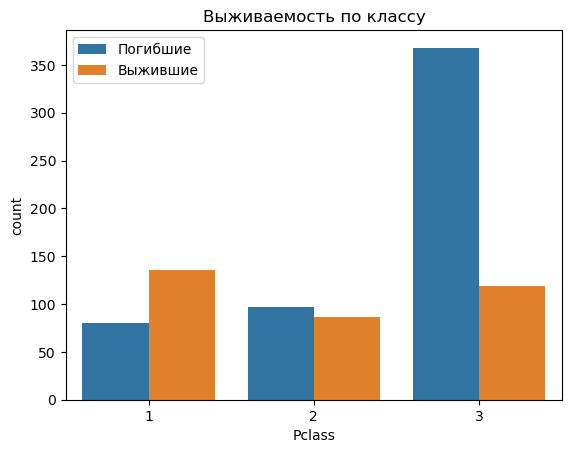

In [179]:
#Визуализируем эти данные через Seaborn
sns.countplot(x='Pclass', data=df, hue='Survived')
plt.title('Выживаемость по классу')
plt.legend(['Погибшие', 'Выжившие'])

- Инсайт: Люди из 1-го класса выживали чаще

### Влияние возраста (Age)

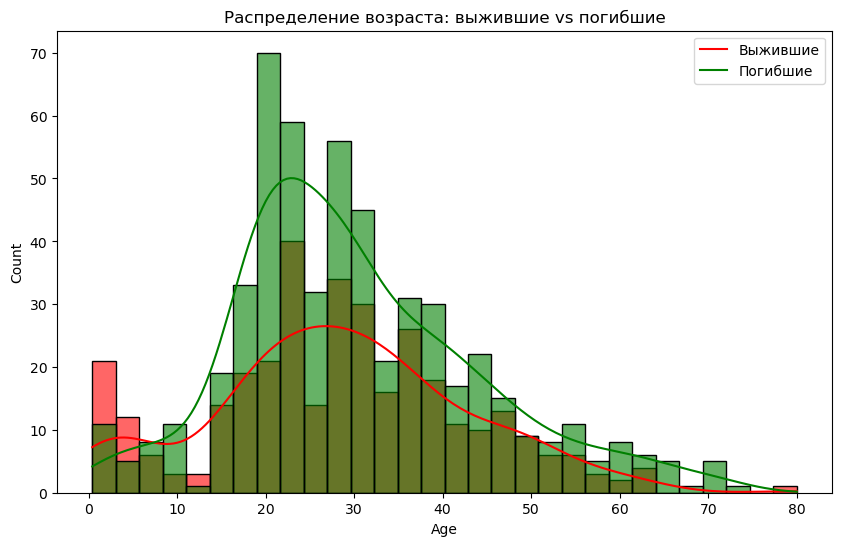

In [197]:
#Построим гистограмму с разделением по Survived
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True,
             palette={0: 'green', 1: 'red'}, alpha=0.6)
plt.title('Распределение возраста: выжившие vs погибшие')
plt.legend(['Выжившие', 'Погибшие'])

Text(0.5, 1.0, 'Ящик с усами: возраст vs выживаемость')

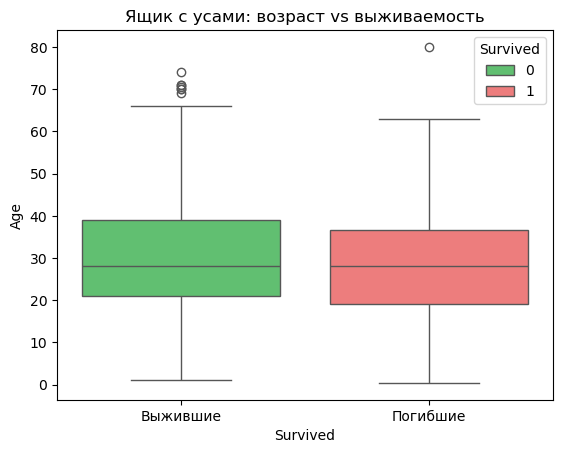

In [209]:
#Построим Boxplot по возрасту для Survived 
sns.boxplot(x='Survived', y='Age', hue='Survived', data=df, palette=['#51cf66', '#ff6b6b'])
plt.xticks([0, 1], ['Выжившие', 'Погибшие'])
plt.title('Ящик с усами: возраст vs выживаемость')

Инсайты:

- Дети (возраст < 10 лет) выживали чаще.

- Пик смертности у молодых взрослых (20–30 лет).

- Медианный возраст выживших (28 лет) ниже, чем у погибших (30 лет).

### Влияние размера семьи (FamilySize, IsAlone)

In [214]:
#Построим сводную таблицу Survived по FamilySize
pd.crosstab(df['FamilySize'], df['Survived'])

Survived,0,1
FamilySize,,
1,370,163
2,72,89
3,43,59
4,8,21
5,12,3
6,19,3
7,8,4
8,6,0
11,7,0


In [216]:
#Построим сводную таблицу Survived по IsAlone
pd.crosstab(df['IsAlone'], df['Survived'])

Survived,0,1
IsAlone,,
0,175,179
1,370,163


([<matplotlib.axis.XTick at 0x1d759573bc0>,
 [Text(0, 0, 'Погибшие'), Text(1, 0, 'Выжившие')])

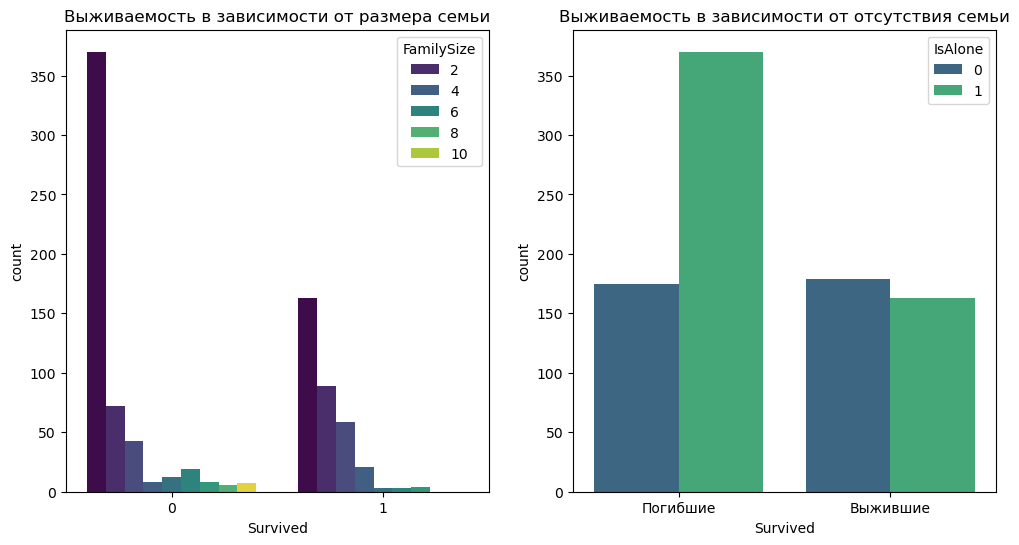

In [255]:
fig, axes = plt.subplots(1,2, figsize=(12,6))

#Оценим Выживаемость в зависимости от размера семьи (FamilySize)
sns.countplot(x='Survived', data=df, hue='FamilySize', palette='viridis', ax=axes[0])
axes[0].set_title('Выживаемость в зависимости от размера семьи')
plt.xticks([0, 1], ['Погибшие', 'Выжившие'])

#Оценим Выживаемость в зависимости от размера семьи (IsAlone)
sns.countplot(x='Survived', data=df, hue='IsAlone', palette='viridis', ax=axes[1])
axes[1].set_title('Выживаемость в зависимости от отсутствия семьи')
plt.xticks([0, 1], ['Погибшие', 'Выжившие'])

- Инсайт: Одиночки или очень большие семьи имели меньшие шансы на выживание по сравнению с семьями среднего размера.

### Влияние стоимости билета (Fare)

Text(0, 0.5, 'Стоимость билета (£)')

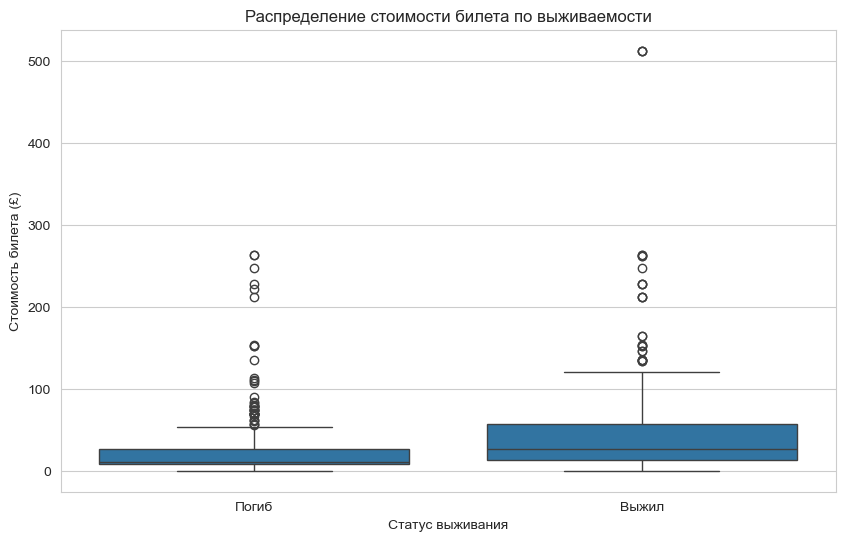

In [314]:
#Построим ящик с усами 
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Fare', data=df)


plt.xticks([0, 1], ['Погиб', 'Выжил'])
plt.title('Распределение стоимости билета по выживаемости')
plt.xlabel('Статус выживания')
plt.ylabel('Стоимость билета (£)')



- Инсайт: Чем дороже билет, тем выше шансы на выживание

Значения квартилей для цены билета:
Q1 (25-й перцентиль): 7.92 £
Q2 (Медиана, 50-й перцентиль): 14.45 £
Q3 (75-й перцентиль): 31.14 £


Text(0, 0.5, 'Количество пассажиров')

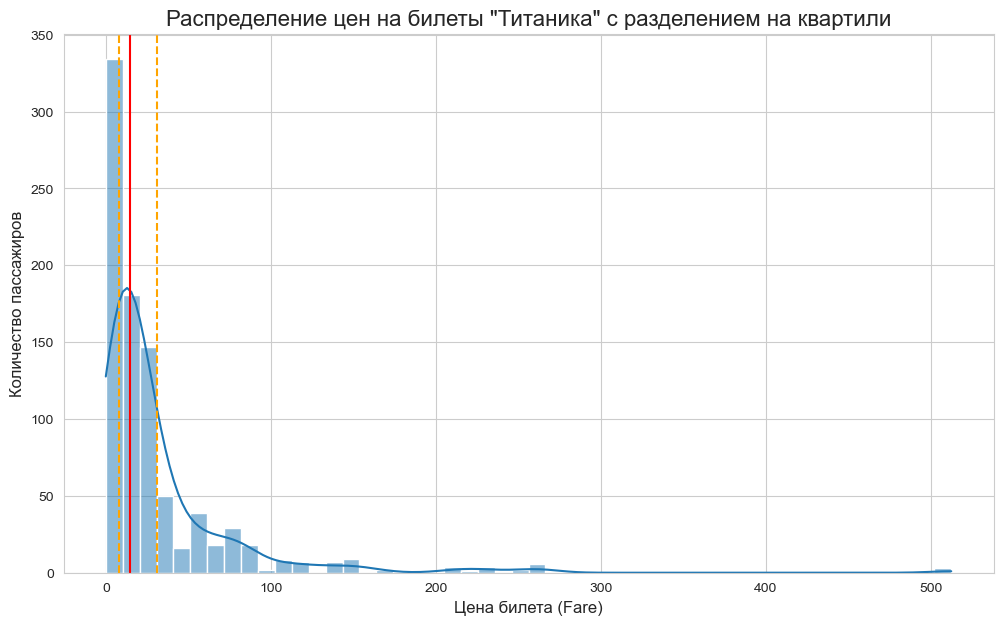

In [325]:

fare_quartiles = df['Fare'].quantile([0.25, 0.5, 0.75])
q1 = fare_quartiles[0.25]
median = fare_quartiles[0.5]
q3 = fare_quartiles[0.75]

print("Значения квартилей для цены билета:")
print(f"Q1 (25-й перцентиль): {q1:.2f} £")
print(f"Q2 (Медиана, 50-й перцентиль): {median:.2f} £")
print(f"Q3 (75-й перцентиль): {q3:.2f} £")




sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))

sns.histplot(data=df, x='Fare', kde=True, bins=50)

plt.axvline(q1, color='orange', linestyle='--', label=f'Q1: {q1:.2f}')
plt.axvline(median, color='red', linestyle='-', label=f'Медиана (Q2): {median:.2f}')
plt.axvline(q3, color='orange', linestyle='--', label=f'Q3: {q3:.2f}')

plt.title('Распределение цен на билеты "Титаника" с разделением на квартили', fontsize=16)
plt.xlabel('Цена билета (Fare)', fontsize=12)
plt.ylabel('Количество пассажиров', fontsize=12)

In [358]:
#Вспомним основные статистические показатели и сдаем вывод
df['Fare'].describe()

count    887.00000
mean      32.30542
std       49.78204
min        0.00000
25%        7.92500
50%       14.45420
75%       31.13750
max      512.32920
Name: Fare, dtype: float64

- Вывод по графику:

Распределение цен на билеты сильно скошено вправо. Это означает, что большинство билетов были недорогими. Также было небольшое количество пассажиров, которые заплатили за свои билеты очень большие деньги, что и "растягивает" график вправо. Квартили наглядно показывают, насколько плотно сгруппирована основная масса пассажиров в низкой ценовой категории.

#### Классификация билетов по цене(£) (Python) 

In [347]:
#Дадим статистические именна нашим данным 
fare_stats = df['Fare'].describe()
min_fare = fare_stats['min']
q1 = fare_stats['25%']
median = fare_stats['50%']
q3 = fare_stats['75%']
max_fare = fare_stats['max']

# Определяем границы для наших четырех категорий
bins = [min_fare - 0.01, q1, median, q3, max_fare] # -0.01 чтобы включить минимальное значение 0
# Определяем названия для каждой категории
labels = [
    'Самые дешевые / Эконом',
    'Ниже среднего',
    'Выше среднего / Дорогие',
    'Самые дорогие / Люкс'
]
df['Fare_Category'] = pd.cut(df['Fare'], bins=bins, labels=labels)

# Группируем данные по новой категории и агрегируем нужную информацию
summary = df.groupby('Fare_Category')['Fare'].agg(
    passenger_count='count',
    min_fare='min',
    max_fare='max'
).reset_index()

# Создаем колонку с диапазоном цен
summary['Диапазон цен (£)'] = summary.apply(
    lambda row: f"{row['min_fare']:.2f} - {row['max_fare']:.2f}", axis=1
)

# Вычисляем долю пассажиров в процентах
total_passengers = len(df)
summary['Доля пассажиров'] = summary['passenger_count'].apply(
    lambda count: f"{(count / total_passengers * 100):.2f}%"
)

# Добавляем названия квартилей
summary['Категория по квартилям'] = ['1-й квартиль', '2-й квартиль', '3-й квартиль', '4-й квартиль']

# Выбираем и переименовываем нужные столбцы для финального вида
final_table = summary[[
    'Категория по квартилям',
    'Диапазон цен (£)',
    'Fare_Category',
    'Доля пассажиров'
]]
final_table = final_table.rename(columns={'Fare_Category': 'Описание'})

print("Сводная таблица по ценовым категориям билетов:")
print(final_table.to_string(index=False))

Сводная таблица по ценовым категориям билетов:
Категория по квартилям Диапазон цен (£)                Описание Доля пассажиров
          1-й квартиль      0.00 - 7.92  Самые дешевые / Эконом          26.83%
          2-й квартиль     8.03 - 14.45           Ниже среднего          23.22%
          3-й квартиль    14.46 - 31.00 Выше среднего / Дорогие          24.92%
          4-й квартиль   31.27 - 512.33    Самые дорогие / Люкс          25.03%


C:\Users\forki\AppData\Local\Temp\ipykernel_17616\3230749182.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby('Fare_Category')['Fare'].agg(


## Комбинированный анализ

### Выживаемость по классу и полу (Survival by Pclass, Sex)

Объединим 2+ признака для более глубокого понимания

Для этого:

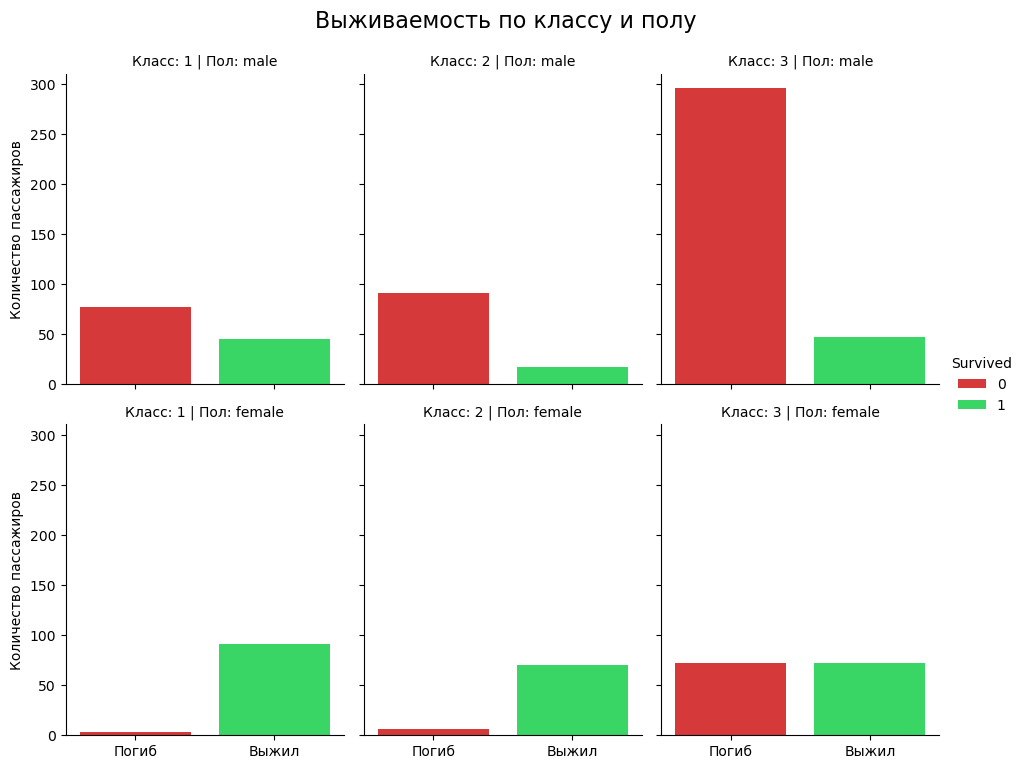

In [52]:
#Создаем FacetGrid через catplot
g = sns.catplot(
    data=df,
    x='Survived',
    col='Pclass',
    row='Sex',
    kind='count',
    height=4,
    aspect=0.8,
    hue='Survived',
    palette={0: '#EF1F1F', 1: '#1FF05A'}
    
)

g.set_axis_labels("", "Количество пассажиров")
g.set_xticklabels(['Погиб', 'Выжил'])
g.set_titles("Класс: {col_name} | Пол: {row_name}")

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Выживаемость по классу и полу', fontsize=16)

plt.show()

- Инсайт: Даже среди мужчин, пассажиры 1-го класса имели значительно более высокие шансы.

### Выживаемость детей по классам (Child Survival by Pclass)

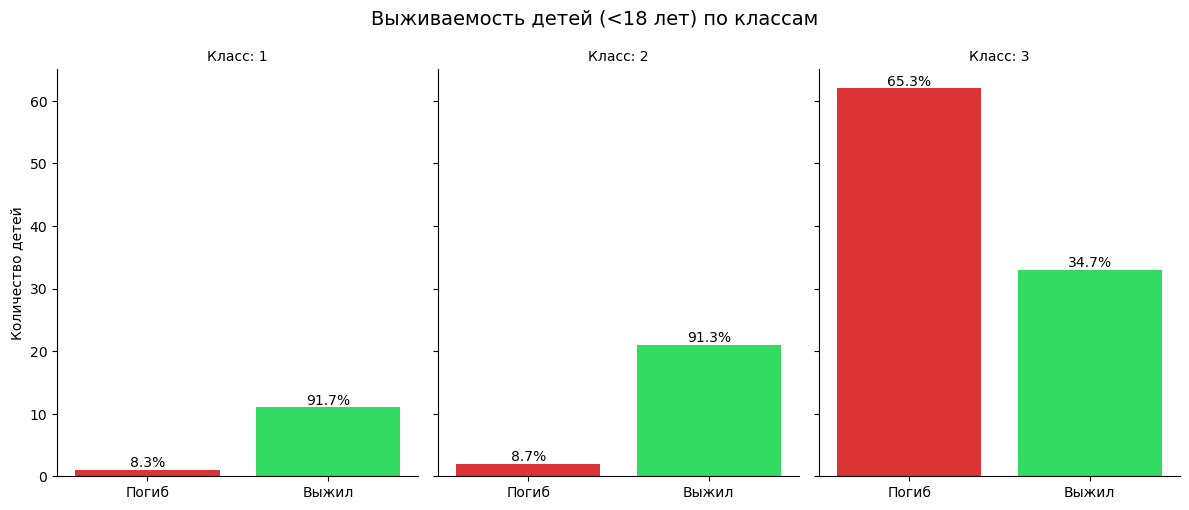

In [28]:
df_children = df[df['IsChild']]

g = sns.catplot(
    data=df_children,
    x='Survived',
    col='Pclass',
    kind='count',
    hue='Survived',
    height=5,
    aspect=0.8,
    palette={0: '#EF1F1F', 1: '#1FF05A'},
    saturation=0.8,
    legend=False
)

g.set_xticklabels(['Погиб', 'Выжил'])
g.set_axis_labels("", "Количество детей")
g.set_titles("Класс: {col_name}")
g.fig.suptitle('Выживаемость детей (<18 лет) по классам', y=1.05, fontsize=14)

# Добавляем проценты к нашим графикам 
for ax in g.axes.flat:
    total = len(df_children[df_children['Pclass'] == int(ax.title.get_text()[-1])])
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2., height + 0.5,
                f'{height/total:.1%}',
                ha='center')

plt.show()

- Принцип "дети в первую очередь" не был универсальным: Хотя дети в целом имели более высокие шансы на выживание по сравнению со взрослыми, этот принцип значительно зависел от класса билета.
- Высокая выживаемость детей в 1-м и 2-м классах: Дети, путешествующие 1-м и 2-м классами, имели чрезвычайно высокие показатели выживаемости (91.7% для 1-го класса, 91.3% для 2-го класса протиав 34.7% у 3-го класса). Это указывает на то, что в этих классах приоритет спасения детей был реализован наиболее эффективно.
- Значительно более низкая выживаемость детей в 3-м классе: Дети из 3-го класса демонстрировали гораздо более низкий процент выживаемости (34.7% выживших) по сравнению с детьми из высших классов. Их шансы на спасение были сопоставимы или даже ниже, чем у взрослых мужчин из 1-го или 2-го класса.

### Выживаемость женщин из разных классов (Female Survival by Pclass)

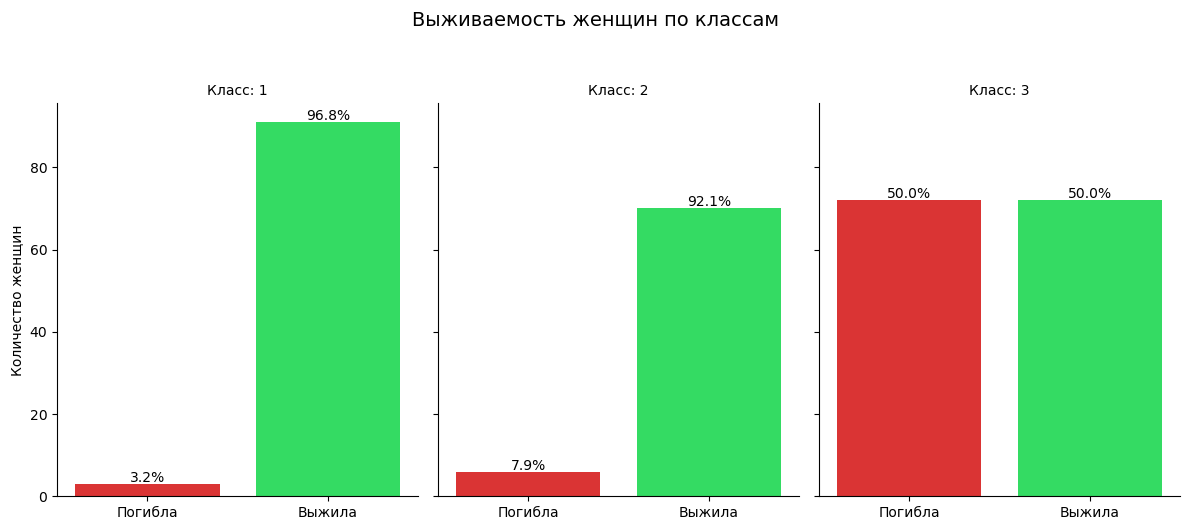

In [32]:
# Фильтруем только женщин
df_women = df[df['Sex'] == 'female']

g = sns.catplot(
    data=df_women,
    x='Survived',
    col='Pclass',  # Разделение по классам
    kind='count',
    height=5,
    aspect=0.8,
    palette={0: '#EF1F1F', 1: '#1FF05A'},
    hue='Survived', 
    saturation=0.8, 
    legend=False
)

g.set_xticklabels(['Погибла', 'Выжила'])
g.set_axis_labels("", "Количество женщин")
g.set_titles("Класс: {col_name}")
g.fig.suptitle('Выживаемость женщин по классам', y=1.05, fontsize=14)

# Добавляем проценты к нашим графикам 
for ax in g.axes.flat:
    # Получаем номер класса из заголовка (последний символ)
    class_num = int(ax.title.get_text()[-1])
    total = len(df_women[df_women['Pclass'] == class_num])
    
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width()/2., 
            height + 0.5,
            f'{height/total:.1%}',  # Процентное соотношение
            ha='center',
            fontsize=10
        )

plt.tight_layout()
plt.show()

- Принцип "женщины в первую очередь" также не был абсолютным: Подобно детям, женщины имели значительное преимущество в выживаемости по сравнению с мужчинами, но это преимущество было неравномерно распределено по классам.
- Почти полная выживаемость женщин в 1-м и 2-м классах: Женщины, путешествующие 1-м классом, демонстрировали 96.8% выживаемость. Женщины из 2-го класса также имели очень высокий процент выживаемости.
- Заметное снижение выживаемости женщин в 3-м классе: Выживаемость женщин из 3-го класса была значительно ниже, чем у женщин из 1-го и 2-го классов, и часто оказывалась даже ниже, чем у мужчин из 1-го класса. Равное соотношение погибших и выживших от общего количества женщин 3-го класса.

- Инсайт: Этот анализ четко демонстрирует глубокое влияние классового разделения на шансы выжить